In [1]:
%load_ext autoreload
%autoreload 2

cd ..

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pycabnn as cbn

In [3]:
from pycabnn.util import HocParameterParser

h = HocParameterParser()
config_hoc = str("./test_data/params/Parameters.hoc")
h.load_file(config_hoc)


In [5]:
mlipop = cbn.create_population("MLI", h)
mlipop.load_somata("../big_test_data/MLIcoordinates.dat")
mlipop.add_dendrites()

Successfully read ../big_test_data/MLIcoordinates.dat.


In [16]:
mlipop.add_dendrites()

In [22]:
mlipop.dends.seg

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [3, 9],
       [3, 9],
       [3, 9]])

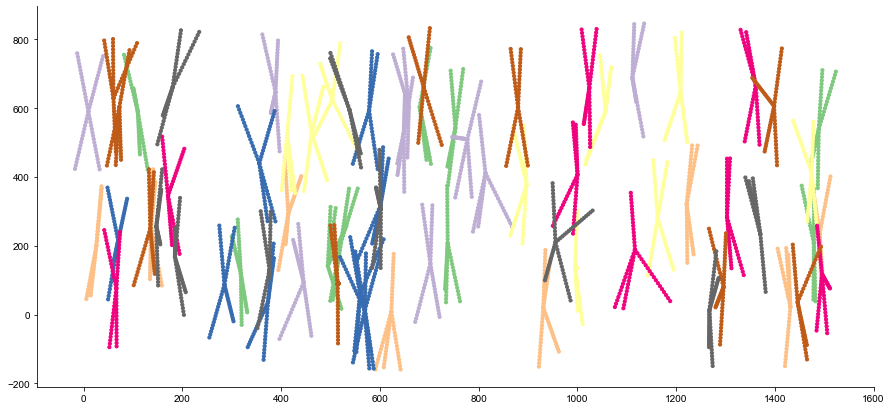

In [20]:
%matplotlib inline
ncell = 70
nidx = ncell*90*4

_, ax = plt.subplots(figsize=(15,7))
ax.scatter(mlipop.dends.coo[:nidx:5,0],mlipop.dends.coo[:nidx:5,1], 10, mlipop.dends.idx[:nidx:5], cmap='Accent')

In [24]:
from scipy.spatial import cKDTree

tree = cKDTree(mlipop.dends.coo)

In [27]:
d = tree.query_pairs(1)
pps = [pp for pp in d if mlipop.dends.idx[pp[0]]!=mlipop.dends.idx[pp[1]]]

In [28]:
len(pps)

460657

In [29]:
c1, c2

NameError: name 'c1' is not defined

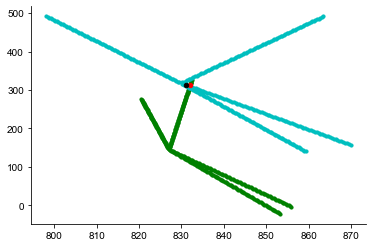

In [35]:
i = 20
c1 = pps[i][0]//360
c2 = pps[i][1]//360

x = 0
y = 1

plt.scatter(mlipop.dends.coo[(c1*360):((c1+1)*360),x],
            mlipop.dends.coo[(c1*360):((c1+1)*360),y], 10, 'g')
plt.scatter(mlipop.dends.coo[(c2*360):((c2+1)*360),x],
            mlipop.dends.coo[(c2*360):((c2+1)*360),y], 10,'c')
plt.scatter(mlipop.dends.coo[pps[i][0],x],
            mlipop.dends.coo[pps[i][0],y], 20, 'r')
plt.scatter(mlipop.dends.coo[pps[i][1],x],
            mlipop.dends.coo[pps[i][1],y], 20, 'k')

In [5]:
from sklearn.neighbors import KDTree

sktree = KDTree(mlipop.dends.coo)
dsk = sktree.query_radius(mlipop.dends.coo, 2)

NameError: name 'mli' is not defined

In [38]:
from scipy.spatial.distance import pdist

In [39]:
cell_pair = np.array([(mlipop.dends.idx[pp[0]], mlipop.dends.idx[pp[1]]) for pp in pps])
cell_pair

array([[ 4007,  5697],
       [ 5122,  7621],
       [ 4981, 15315],
       ...,
       [  383, 14788],
       [ 6285, 18861],
       [ 3163, 11775]])

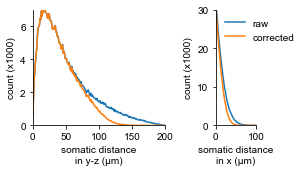

In [40]:
z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,1] = 0
z2[:,1] = 0

# z3 = mlipop.som*1.0
# z3[:,1] = 0

dist = np.linalg.norm(z1 - z2, axis=1)
# dist0 = pdist(z3)

n, x = np.histogram(dist,np.arange(201))
n = n/1e3
# n0, x0 = np.histogram(dist0, np.arange(201))

fig = plt.figure(figsize=(4,2.5))
gs = fig.add_gridspec(1, 3)
ax = fig.add_subplot(gs[0, 0:2])

ax.plot(x[:-1], n, label='raw')
ax.plot(x[:-1], n*1/(1+np.exp((x[:-1]-105)/12)), label='corrected')
# ax.plot(x0[:-1], n0)
ax.set(
    xlim=[0, 200], ylim=[0, 7],
    xlabel='somatic distance\nin y-z (μm)',
    ylabel='count (x1000)'
)
# ax.legend()

z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,1] = 0
z2[:,1] = 0
z1[:,2] = 0
z2[:,2] = 0

dist = np.linalg.norm(z1 - z2, axis=1)

n, x = np.histogram(dist,100)
n = n/1e3
ax = fig.add_subplot(gs[0, 2])
ax.plot(x[:-1], n, label='raw')
ax.plot(x[:-1], n*1/(1+np.exp((x[:-1]-30)/10)), label='corrected')
ax.set(
    xlim=[0, 100],
    ylim=[0, 30],
    xlabel='somatic distance\nin x (μm)',
    ylabel='count (x1000)'
)
ax.legend()

plt.tight_layout()
# plt.savefig('ngap_vs_dist.png', dpi=600)

In [224]:
z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,1] = 0
z2[:,1] = 0
z1[:,2] = 0
z2[:,2] = 0

dist = np.linalg.norm(z1 - z2, axis=1)

[(0.0, 100.0), (0.0, 30000.0)]

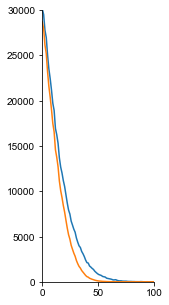

In [233]:
n, x = np.histogram(dist,100)
_, ax = plt.subplots(figsize=(2,5))
ax.plot(x[:-1], n)
ax.plot(x[:-1], n*1/(1+np.exp((x[:-1]-30)/10)))
ax.set(xlim=[0, 100], ylim=[0, 30000])